***Preliminary data analysis***

In [1]:
import sys
sys.path.append('../Data_Feature')
sys.path.append('../Data_processing')
import numpy as np
import pandas as pd
from data_processing import KOProcessor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, fcluster
from matplotlib.patches import Patch
import matplotlib as mpl
from scipy.stats import pearsonr


In [2]:
# Initialize processor with dataset paths  
processor = KOProcessor(  
    terms_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/terms_KO.zip', #Absolute path was used due to bug in relative path
    terms_csv_path = 'terms_KO.csv',
    traits_reduced_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/reducedDataset.zip', #Absolute path was used due to bug in relative path
    traits_reduced_csv_path = 'reducedDataset.csv',
    traits_assembled_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/assembledDataset.zip', #Absolute path was used due to bug in relative path
    traits_assembled_csv_path = 'assembledDataset.csv' 
)  

# Load datasets from ZIP  
ko_terms = processor.load_terms()  # KO annotations  
reduced_traits = processor.load_reduced_traits_data()  # Primary traits  
assembled_traits = processor.load_assembled_traits_data()  # Supplemental traits  

# Display raw data structure  
print("KO Terms Columns:", ko_terms.columns.tolist())  
print("Reduced Traits Columns:", reduced_traits.columns.tolist())
print("Assembled Traits Columns:", assembled_traits.columns.tolist())
print("KO Terms Shape:", ko_terms.shape)
print("Reduced Traits Shape:", reduced_traits.shape)
print("Assembled Traits Shape:", assembled_traits.shape)
display(assembled_traits)
  


Data loaded successfully:
   Unnamed: 0   key      KO
0           0  1000  K00001
1           1  1000  K13954
2           2  1000  K00003
3           3  1000  K00013
4           4  1000  K00014
Data loaded successfully:
   key        ID                      speciesStrain  \
0    1  592010.0   Abiotrophia defectiva ATCC 49176   
1    1     219.0     Abiotrophia defectiva DSM 9849   
2    2  159837.0       Abyssibacter profundi OUC007   
3    3       NaN  Acanthopleuribacter pedis FYK2218   
4    4  258515.0   Acetanaerobacterium elongatum Z7   

                 speciesStrainComp                genus            genusComp  \
0    abiotrophiadefectivaatcc49176          Abiotrophia          abiotrophia   
1      abiotrophiadefectivadsm9849          Abiotrophia          abiotrophia   
2       abyssibacterprofundiouc007         Abyssibacter         abyssibacter   
3  acanthopleuribacterpedisfyk2218  Acanthopleuribacter  acanthopleuribacter   
4   acetanaerobacteriumelongatumz7  Acetanaerobac

,Unnamed: 0,database,taxID,bacdiveID,speciesStrainComp,genusComp,speciesComp,strainComp,speciesStrain,genus,...,producedComp,pathogenicity,reducedEnzAct,increasedEnzAct,variableEnzAct,extremophile,abSusceptible,genes,ref,genomeAccNo
0,0,bacdive,NaN,1.0,acetobacteracetib4114,acetobacter,acetobacteraceti,b4114,Acetobacter aceti B 4114,Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,bacdive,NaN,2.0,acetobacteracetidsm3508,acetobacter,acetobacteraceti,dsm3508,Acetobacter aceti DSM 3508,Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCA_000193495|GCA_002005445|GCA_004341595|GCA_...
2,2,bacdive,NaN,3.0,acetobactercerevisiaedsm2324,acetobacter,acetobactercerevisiae,dsm2324,Acetobacter cerevisiae DSM 2324,Acetobacter,...,acetic acid|vinegar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,bacdive,NaN,4.0,acetobacterpasteurianus190,acetobacter,acetobacterpasteurianus,190,Acetobacter pasteurianus 190,Acetobacter,...,NaN,NaN,NaN,catalase,NaN,NaN,NaN,NaN,NaN,GCA_003850805|GCA_000285275|GCA_003332155
4,4,bacdive,NaN,5.0,acetobacterpasteurianusasaia5bu121porges38,acetobacter,acetobacterpasteurianus,asaia5bu121porges38,"Acetobacter pasteurianus Asai A-5, BU 121, Por...",Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BACG00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147671,147671,protraits,633.0,NaN,yersiniapseudotuberculosis,yersinia,yersiniapseudotuberculosis,NaN,Yersinia pseudotuberculosis,Yersinia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147672,147672,protraits,63186.0,NaN,zobelliagalactanivorans,zobellia,zobelliagalactanivorans,NaN,Zobellia galactanivorans,Zobellia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147673,147673,protraits,350.0,NaN,zoogloearamigera,zoogloea,zoogloearamigera,NaN,Zoogloea ramigera,Zoogloea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147674,147674,protraits,398743.0,NaN,zunongwangiaprofunda,zunongwangia,zunongwangiaprofunda,NaN,Zunongwangia profunda,Zunongwangia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)
c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)


Aggregated labels for 'gram'. Unique keys: 583
Aggregated labels for 'oxygen'. Unique keys: 3256
Data loaded successfully:
   Unnamed: 0 database  taxID  bacdiveID  \
0           0  bacdive    NaN        1.0   
1           1  bacdive    NaN        2.0   
2           2  bacdive    NaN        3.0   
3           3  bacdive    NaN        4.0   
4           4  bacdive    NaN        5.0   

                            speciesStrainComp    genusComp  \
0                       acetobacteracetib4114  acetobacter   
1                     acetobacteracetidsm3508  acetobacter   
2                acetobactercerevisiaedsm2324  acetobacter   
3                  acetobacterpasteurianus190  acetobacter   
4  acetobacterpasteurianusasaia5bu121porges38  acetobacter   

               speciesComp           strainComp  \
0         acetobacteraceti                b4114   
1         acetobacteraceti              dsm3508   
2    acetobactercerevisiae              dsm2324   
3  acetobacterpasteurianus         

c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)


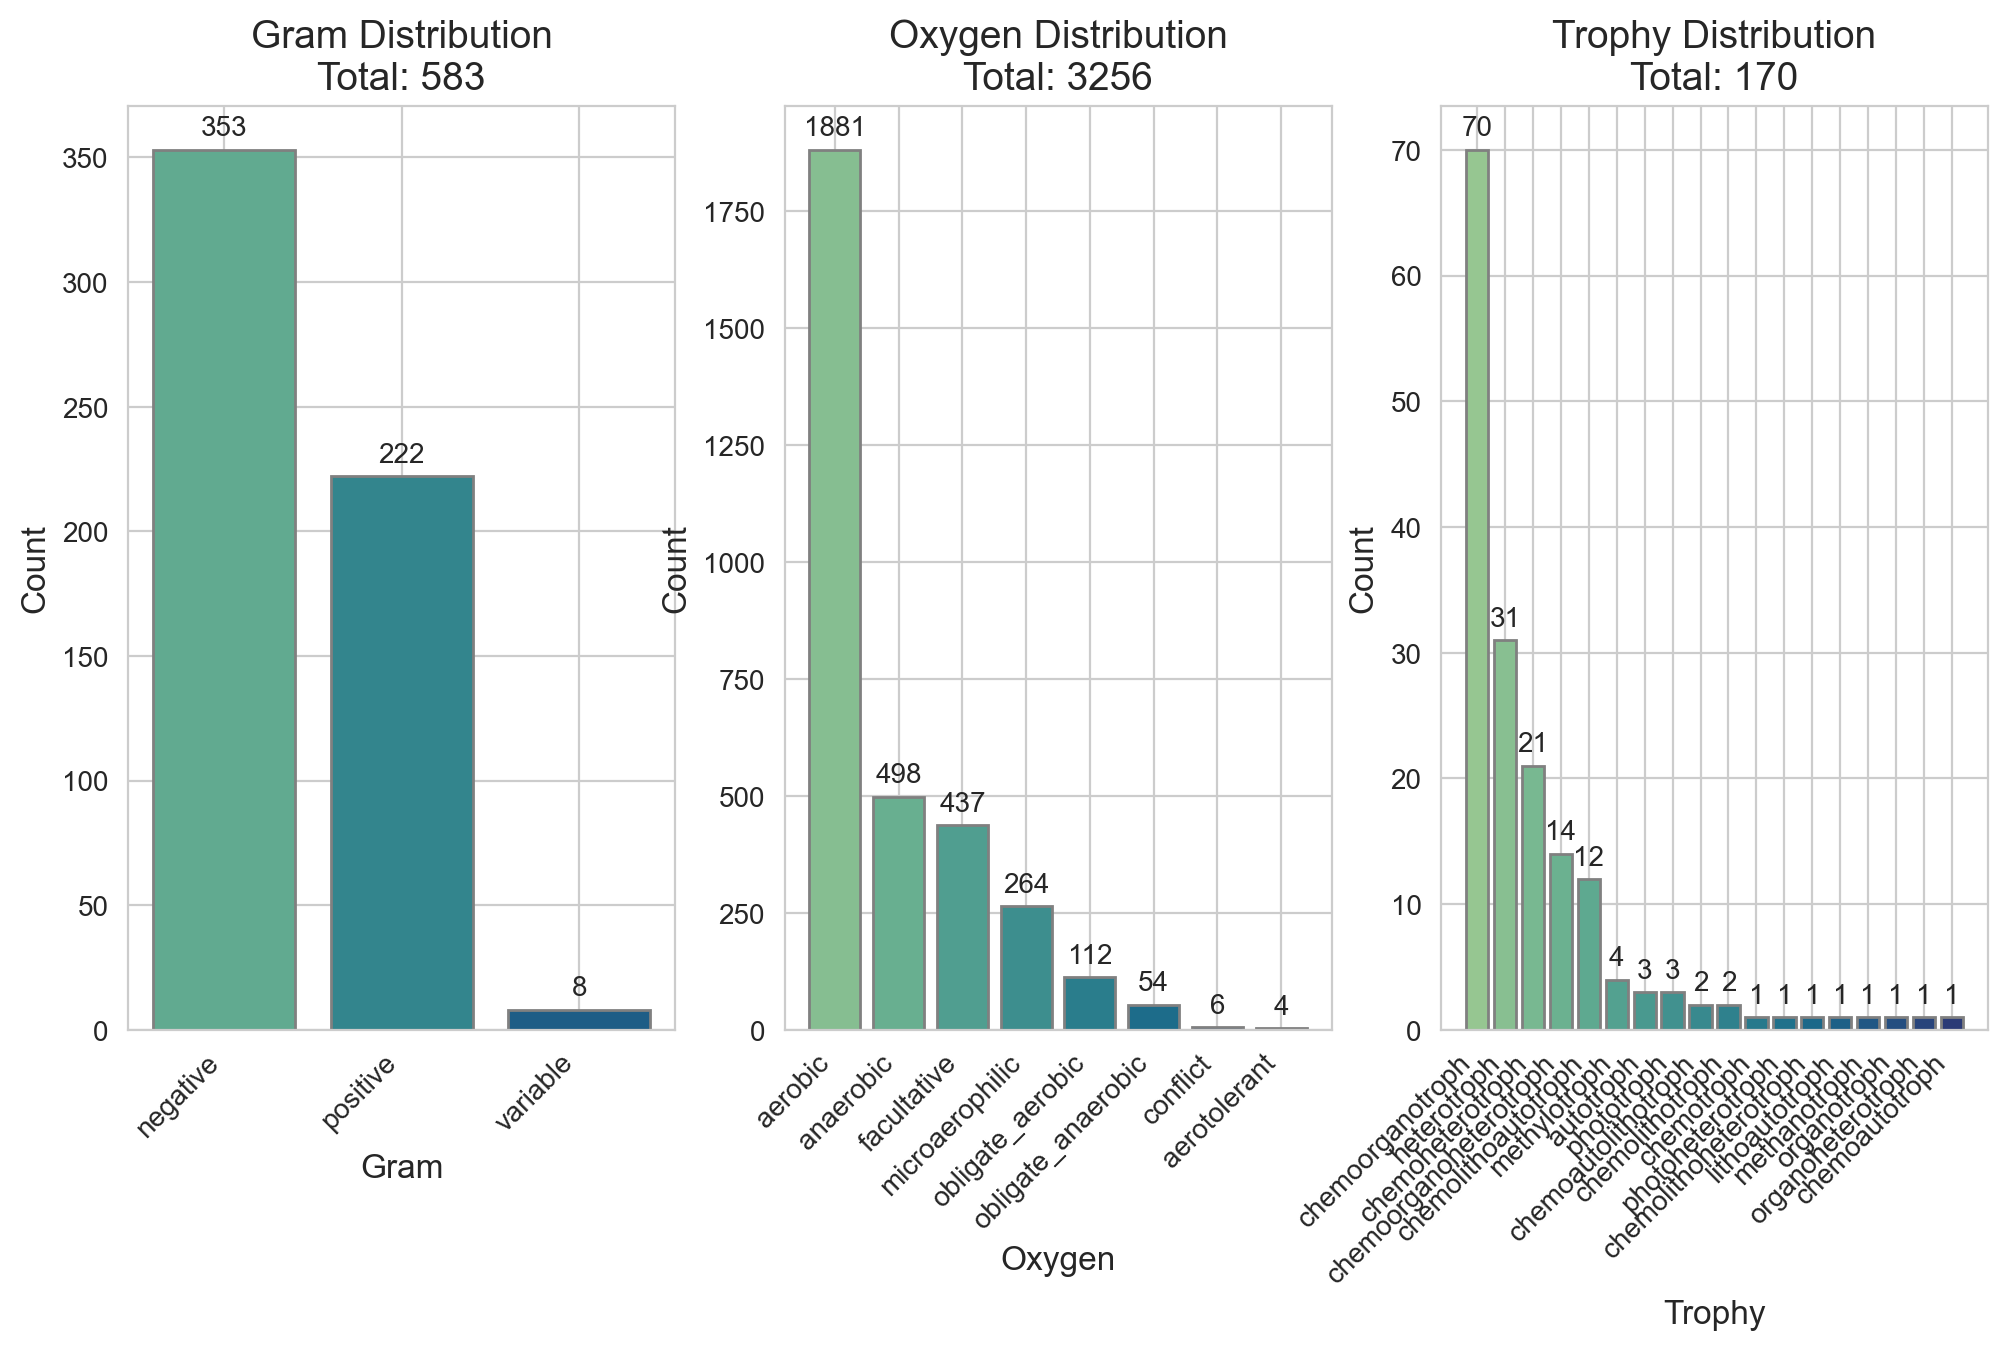

In [3]:
# plotting trait distribution
def group_top_n_counts(counts, trait, top_n=20):
    if len(counts) > top_n:
        top = counts.nlargest(top_n)
        other_sum = counts.drop(top.index).sum()
        top[f'other ({trait})'] = other_sum
        return top
    else:
        return counts


grid_traits = [
    ('gram', processor.preprocess_traits(reduced_traits, 'gram', use_assembled_if_missing=True).value_counts()),
    ('oxygen', processor.preprocess_traits(reduced_traits, 'oxygen', use_assembled_if_missing=True).value_counts()),
    ('Trophy', processor.preprocess_traits(reduced_traits, 'trophy', use_assembled_if_missing=True).value_counts())
]


sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6), constrained_layout=False, dpi=200)

for i, (ax, (trait, counts)) in enumerate(zip(axes, grid_traits)):

    grouped = group_top_n_counts(counts, trait, top_n=20)
    total = counts.sum()

   
    colors = sns.color_palette("crest", n_colors=len(grouped))


    bars = ax.bar(grouped.index, grouped.values, color=colors, edgecolor='gray')


    ax.set_title(f"{trait.capitalize()} Distribution\nTotal: {total}", fontsize=14)
    ax.set_xlabel(trait.capitalize(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

   
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

   
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{int(height)}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.show()


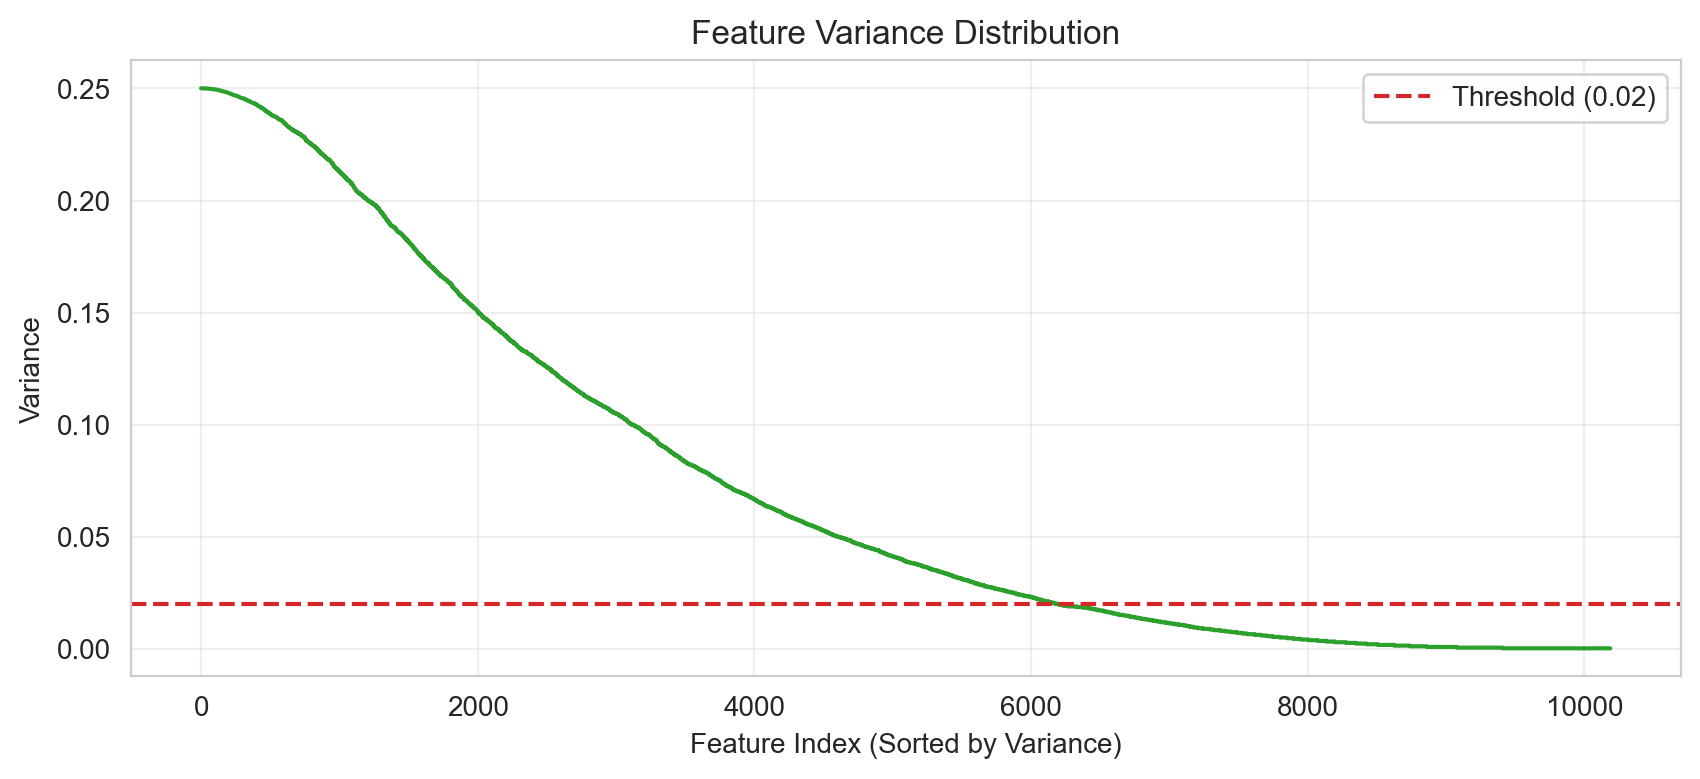

In [4]:
# Compute variance for KO terms  
X_terms = processor.preprocess_terms(ko_terms)  
variances = X_terms.var(axis=0).sort_values(ascending=False)  

 
plt.figure(figsize=(10, 4), dpi=200)  
plt.plot(range(len(variances)), variances.values, linestyle='-', color='#2ca02c')  
plt.axhline(y=0.02, color='#d62728', linestyle='--', label='Threshold (0.02)')  
plt.title('Feature Variance Distribution', fontsize=12)  
plt.xlabel('Feature Index (Sorted by Variance)', fontsize=10)  
plt.ylabel('Variance', fontsize=10)  
plt.legend()  
plt.grid(alpha=0.3)  
plt.show()  

Dropped 9 columns with no missing values (except'speciesStrain'): ['key', 'speciesStrainComp', 'genus', 'genusComp', 'species', 'speciesComp', 'genomeAccNo', 'usedAccNo', 'ncbiFTP_FAA']


C:\Users\eliah\AppData\Local\Temp\ipykernel_52728\402267825.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pruned_missing.values, y=pruned_missing.index, palette='crest')


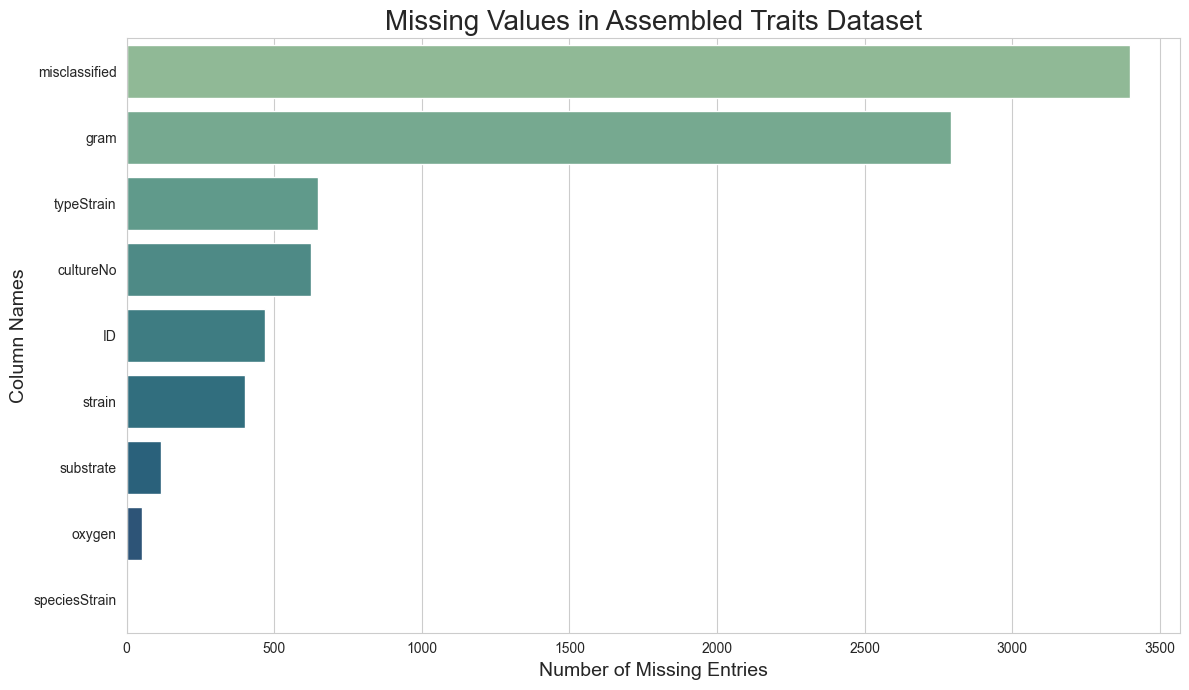

In [7]:
#Missing values in datasets - change datasets in order to inspect the different ones


missing_counts = reduced_traits.isnull().sum()


cols_to_drop = [
    col for col, n_miss in missing_counts.items()
    if (n_miss == 0 and col not in ['speciesStrain', 'misclassified'])
]
reduced_pruned = reduced_traits.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns with no missing values (except'speciesStrain'): {cols_to_drop}")


pruned_missing = reduced_pruned.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=pruned_missing.values, y=pruned_missing.index, palette='crest')
plt.title('Missing Values in Assembled Traits Dataset', fontsize=20)
plt.xlabel('Number of Missing Entries', fontsize=14)
plt.ylabel('Column Names', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Align data for each trait
traits_to_plot = ['oxygen', 'substrate', 'gram']
aligned_data = {}

for trait in traits_to_plot:
    y_trait = processor.preprocess_traits(
        reduced_traits, trait, use_assembled_if_missing=False
    )
    _, y_aligned = processor.align_data(X_terms, y_trait)
    aligned_data[trait] = y_aligned

def group_small_pie_counts(counts, trait, threshold_pct=1.4):
    total = counts.sum()
    pct   = counts / total * 100
    small = pct < threshold_pct
    other = counts[small].sum()
    counts = counts[~small]
    if other > 0:
        counts[f'other ({trait})'] = other
    return counts

# Plot pie charts
fig, axes = plt.subplots(1, len(traits_to_plot), figsize=(30, 10))

for ax, trait in zip(axes, traits_to_plot):
    counts = pd.Series(aligned_data[trait]).value_counts()
    grouped = group_small_pie_counts(counts, trait)

    
    colors = sns.color_palette('crest', n_colors=len(grouped))

    ax.pie(
        grouped.values,
        labels=grouped.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,           
        wedgeprops=dict(edgecolor='w')  
    )
    ax.set_title(f'{trait.capitalize()} Distribution After Alignment', fontsize=14)

plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(12,6))
plt.spy(X_terms.sample(1000, random_state=42).values, 
       markersize=0.1, aspect='auto')
plt.title('KO Term Presence/Absence Pattern (1000 Random Samples)')
plt.xlabel('KO Features')
plt.ylabel('Strains')
plt.show()